In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
from empiricaldist import Cdf

In [2]:
# Crear un Cdf vacio
d4 = Cdf()
d4

,probs


In [3]:
# Cdf que representa un dado de 6 lados
d4[1] = 1
d4[2] = 2
d4[3] = 3
d4[4] = 4
d4[5] = 5
d4[6] = 6 

d4

,probs
1,1
2,2
3,3
4,4
5,5
6,6


In [4]:
# Normalizando el Cdf
# de esta manera, la suma de las probabilidades es igual a 1
d4.normalize()

6

In [5]:
d4

,probs
1,0.166667
2,0.333333
3,0.500000
4,0.666667
5,0.833333
6,1.000000


### Propiedades

In [6]:
# un Cdf contiene en el indice las cantidades qs y en los valores las probabilidades ps
# Se devuelven como matriz
# indices
d4.qs

array([1, 2, 3, 4, 5, 6])

In [7]:
# probabilidades
d4.ps

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        ])

### Intercambio

In [8]:
#Debido a que Cdf es una Serie, puede ser inicializada con cualquier tipo de Series
# con dictionary
d = dict(a=1, b=2, c=3)
cdf = Cdf(d)
cdf.normalize()
cdf

,probs
a,0.333333
b,0.666667
c,1.000000


In [9]:
# con listas
qs = [1,2,3,4]
ps = [0.25, 0.50,0.75,1.0]
d4 = Cdf(ps, index=qs)
d4

,probs
1,0.25
2,0.50
3,0.75
4,1.00


In [10]:
# Copiar un Cdf
d4_copy = Cdf(d4)
d4_copy

,probs
1,0.25
2,0.50
3,0.75
4,1.00


In [11]:
# se debe tener cuidado a la hora de copiar ya que las copias comparten el mismo array
d4.index is d4_copy.index

True

In [12]:
d4.ps is d4_copy.ps

True

In [13]:
#Evita compartir el array con el parametro copy=True
d4_copy = Cdf(d4, copy=True)
d4_copy

,probs
1,0.25
2,0.50
3,0.75
4,1.00


In [14]:
d4.index is d4_copy.index

False

In [15]:
# utiliza la funcion copy de manera explicita para copiar un Cdf sin compartir el array
d4_copy = d4.copy()
d4_copy

,probs
1,0.25
2,0.50
3,0.75
4,1.00


In [16]:
d4.index is d4_copy.index

False

### Visualizacion de Cdf

In [17]:
# configuracion de graficos
def decorate_dice(title):
    plt.xlabel('Outcome')
    plt.ylabel('CDF')
    plt.title(title)

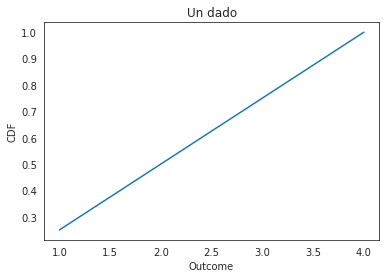

In [18]:
# grafico de la Cdf d4
d4.plot()
decorate_dice('Un dado')

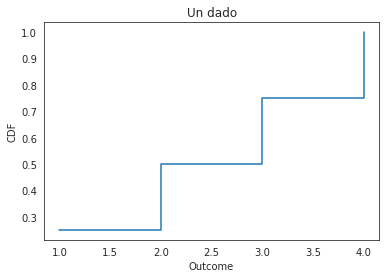

In [19]:
#Cdf poseen una funcion step la cual grafica la Cdf como una funcion de paso
d4.step()
decorate_dice('Un dado')

### Hacer Cdf from sequence

In [20]:
# la funcion from_sequence crea un objeto Cdf a partir de una secuencia de valores
cdf = Cdf.from_seq(list('jeinfferson'))
cdf

,probs
e,0.181818
f,0.363636
i,0.454545
j,0.545455
n,0.727273
o,0.818182
r,0.909091
s,1.000000


In [21]:
cdf = Cdf.from_seq(np.array([1,2,3,4,5]))
cdf

,probs
1,0.2
2,0.4
3,0.6
4,0.8
5,1.0


### Seleccion

In [22]:
# Cdf hereda [] de series, por lo que puede buscar un cuantil y obtener su probabilidad acumulada
#Probabilidad acumulada de la cara 3 de d4
d4[3]

0.75

In [23]:
#Probabilidad acumulada de la cada 2 de d4
d4[2]

0.5

In [24]:
#Los objetos Cdf son mutables, pero en general el resultado no es un Cdf valido
d4[5] = 1.25
d4

,probs
1,0.25
2,0.50
3,0.75
4,1.00
5,1.25


In [25]:
# al agregar una nueva cara y su correspondiente probabilidad rompemos la normalizacion
# La manera de arreglarlo es volver a normalizar el objeto Cdf
d4.normalize()
d4

,probs
1,0.2
2,0.4
3,0.6
4,0.8
5,1.0


### Evaluando CDFs

In [34]:
#Evalua la probabilidad acumulada en una distribucion CDFs de una cantidad especifica

#dado de 6 caras
d6 = Cdf.from_seq([1,2,3,4,5,6])

d6.forward(4)

array(0.66666667)

In [36]:
# Con el metodo forward podemos interpolar el valor de probabilidad acumulada para valores
# que no estan en la distribucion
d6.forward(3.5)

array(0.5)

In [38]:
d6.forward(8)

array(1.)

In [44]:
# __call__ es un sinonimo de forward, por lo que podemos llamar a Cdf como una funcion
d6(1)

array(0.16666667)

In [40]:
# forward tambien puede tomar un array de valores
d6.forward([1,3,5])

array([0.16666667, 0.5       , 0.83333333])

In [41]:
# Estilo de Grafica para Cdf
def decorate_cdf(title):
    plt.xlabel('Quantity')
    plt.ylabel('CDF')
    plt.title(title)

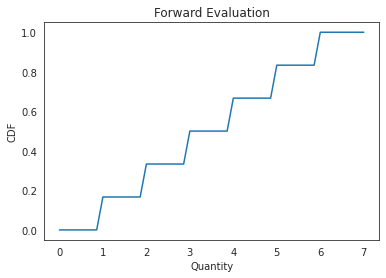

In [42]:
# Grafica de probabilidad para cada valor de una lista

qs = np.linspace(0,7)
ps = d6(qs)

plt.plot(qs, ps)
decorate_cdf('Forward Evaluation')

In [46]:
# Cdf tambien provee de la inversa, la cual calcula la inversa de Cdf
# Calcula el valor que corresponde a una probabilidad acumulada especifica de una Distribucion Cdf
d6.inverse(0.5)

array(3.)

In [50]:
# Utiliza el metodo quantile tambien para obtener el valor asociado a una probabilidad acumulada especifica
d6.quantile(0.16)

array(1.)

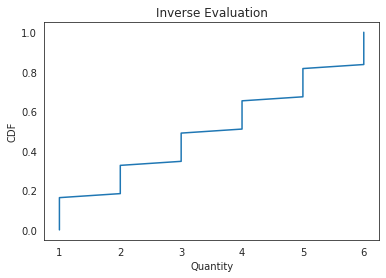

In [51]:
# Grafica del Valor para cada probabilidad acumulada
ps = np.linspace(0,1)
qs = d6.quantile(ps)
plt.plot(qs, ps)
decorate_cdf('Inverse Evaluation')

Estas funciones proporcionan una forma sencilla de hacer graficos Q-Q. Los Graficos Q-Q permiten realizar diagnosticos de diferencias entre la distribucion de probabilidad de una poblacion de la que se ha extraido una muestra aleatoria  y una distribucion usada para la comparacion

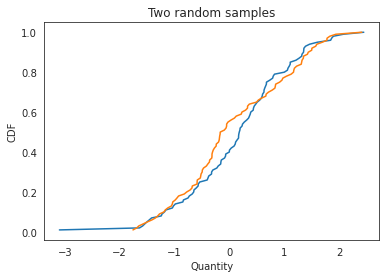

In [52]:
# dos muestras de la misma distribucion
cdf1 = Cdf.from_seq(np.random.normal(size=100))
cdf2 = Cdf.from_seq(np.random.normal(size=100))

cdf1.plot()
cdf2.plot()
decorate_cdf('Two random samples')
